In [3]:
#importing necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

In [34]:
#reading the datasets
df = pd.read_csv('MobileTrain.csv')
df1=df

In [5]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [8]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

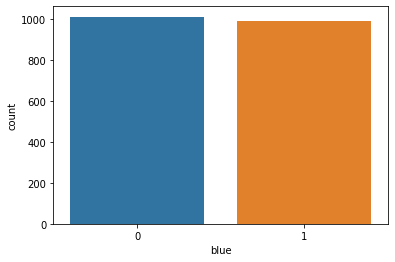

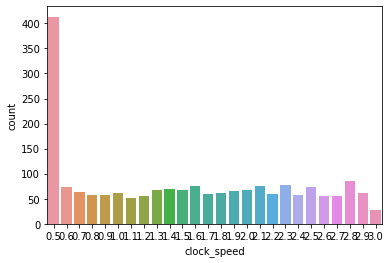

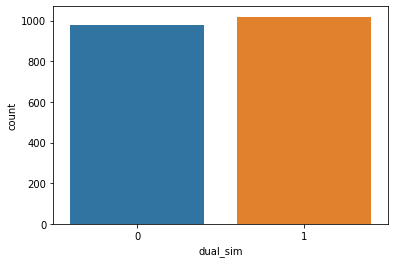

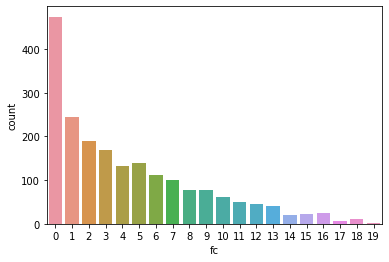

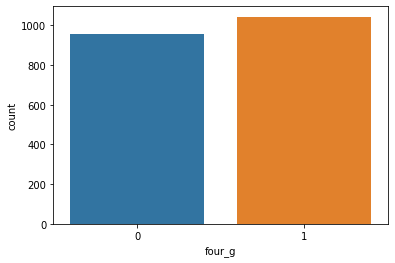

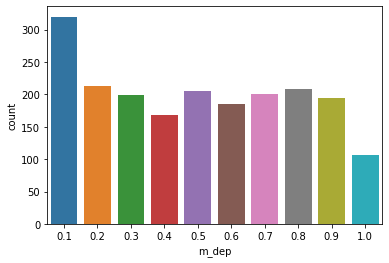

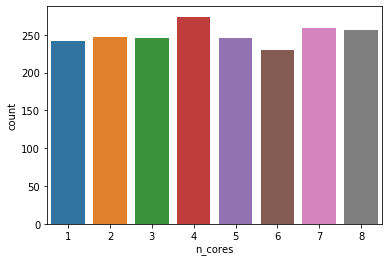

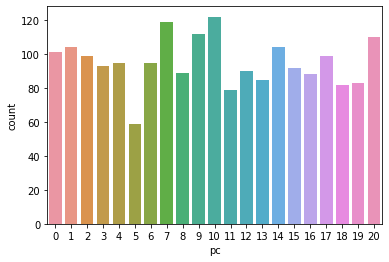

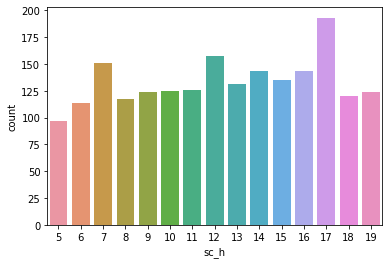

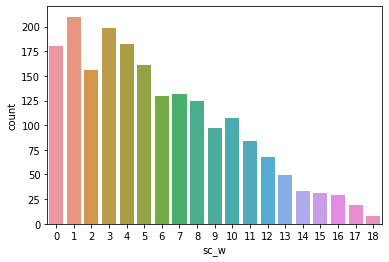

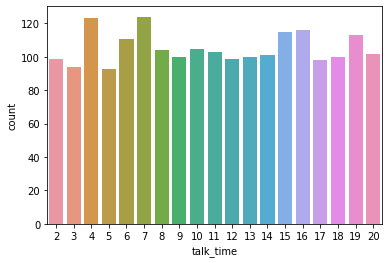

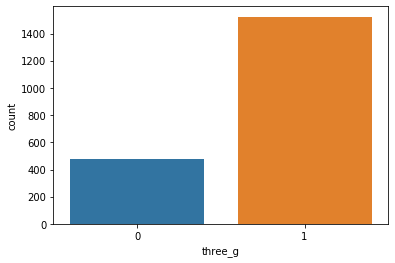

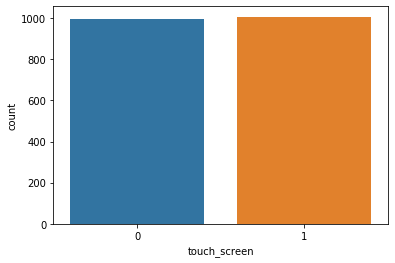

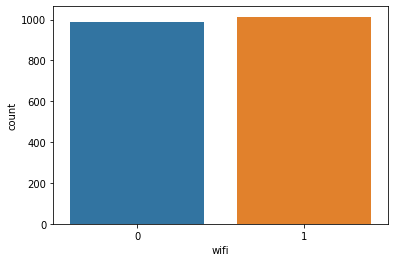

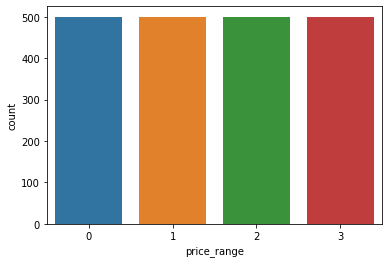

In [9]:
#CountPlot for various columns for train dataset
for i in df:
    if(df[i].nunique()<30):
        sns.countplot(x = df[i])
        plt.show()

In [15]:
#pie chart on individual columns
df = df.rename(columns={'blue': 'hasBluetooth'})
df['hasBluetooth'].replace({0: 'No',1:'Yes'}, inplace=True)
px.pie(data_frame = df, names = 'hasBluetooth', title='Percentage of devices having Bluetooth or not', hole=0.2)

In [16]:
#pie chart on individual columns
df = df.rename(columns={'n_cores': 'Cores'})
df['Cores'].replace({1: 'Single-Core',2:'Dual-Core',3:'Triple-Core',4:'Quad-Core',5:'Penta-Core',6:'Hexa-Core',7:'Hepta-Core',8:'Octa-Core'}, inplace=True)
px.pie(data_frame = df, names = 'Cores', title='Percentage of devices having different Number of Cores', hole=0.2)

In [17]:
#pie chart on individual columns
df = df.rename(columns={'dual_sim': 'isDualSim'})
df['isDualSim'].replace({0: 'No',1:'Yes'}, inplace=True)
px.pie(data_frame = df, names = 'isDualSim', title='Percentage of devices having Dual Sim or not', hole=0.2)

In [18]:
#pie chart on individual columns
df = df.rename(columns={'four_g': 'isFour_G'})
df['isFour_G'].replace({0: 'No',1:'Yes'}, inplace=True)
px.pie(data_frame = df, names = 'isFour_G', title='Percentage of devices having 4G Connection or not', hole=0.2)

In [19]:
#pie chart on individual columns
df = df.rename(columns={'three_g': 'isThree_G'})
df['isThree_G'].replace({0: 'No',1:'Yes'}, inplace=True)
px.pie(data_frame = df, names = 'isThree_G', title='Percentage of devices having 3G Connection', hole=0.2)

In [20]:
#pie chart on individual columns
df = df.rename(columns={'touch_screen': 'hasTouchScreen'})
df['hasTouchScreen'].replace({0: 'No',1:'Yes'}, inplace=True)
px.pie(data_frame = df, names = 'hasTouchScreen', title='Percentage of devices having a Touch Screen or not', hole=0.2)

In [21]:
#pie chart on individual columns
df = df.rename(columns={'wifi': 'WIFI'})
df['WIFI'].replace({0: 'No',1:'Yes'}, inplace=True)
px.pie(data_frame = df, names = 'WIFI', title='Percentage of devices having WIFI Connection or not', hole=0.2)

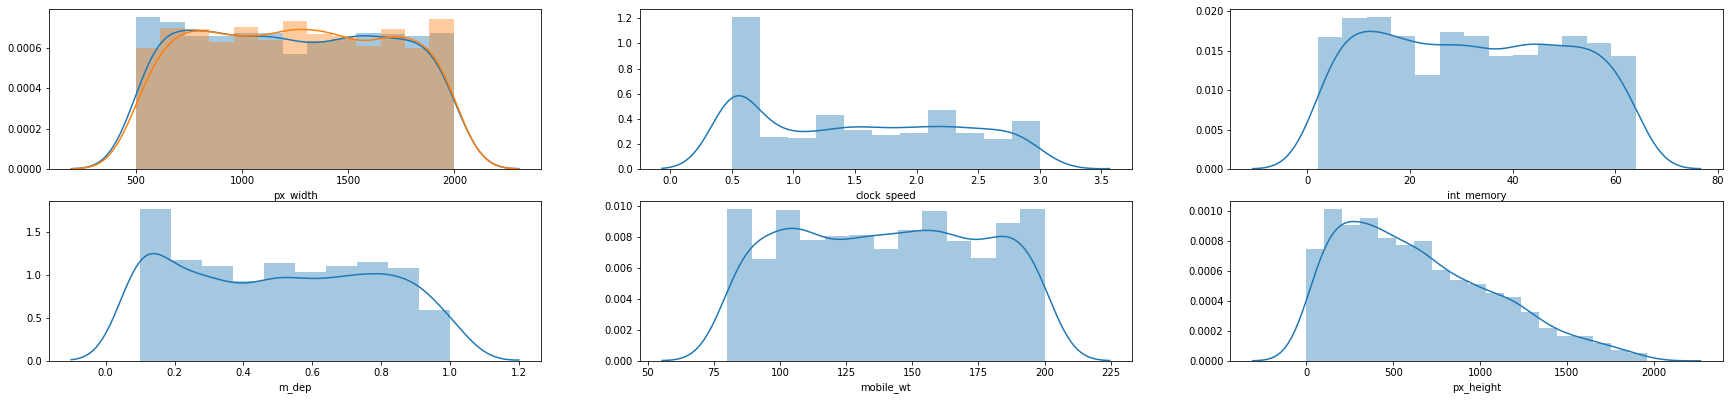

In [22]:
#distplot for various columns
plt.figure (figsize = (30,10))
plt.subplot(331)
sns.distplot(df['battery_power'])
plt.subplot(332)
sns.distplot(df['clock_speed'])
plt.subplot(333)
sns.distplot(df['int_memory'])
plt.subplot(334)
sns.distplot(df['m_dep'])
plt.subplot(335)
sns.distplot(df['mobile_wt'])
plt.subplot(336)
sns.distplot(df['px_height'])
plt.subplot(331)
sns.distplot(df['px_width'])
plt.show()

In [25]:
#histogram
px.histogram(data_frame = df, x = 'hasBluetooth', color='price_range', title = 'Comparisons of devices sold having Bluetooth or not')

In [26]:
#histogram
px.histogram(data_frame = df, x = 'isDualSim', color='price_range', title = 'Comparisons of devices sold having Dual Sim or not')

In [27]:
px.histogram(data_frame = df, x = 'Cores', color='price_range', title = 'Comparison of devices sold having Different Cores')

In [28]:
px.histogram(data_frame = df, x = 'WIFI', color='price_range', title = 'Comparison of devices sold having WIFI or not')

In [29]:
px.histogram(data_frame = df, x = 'hasTouchScreen', color='price_range', title = 'Comparison of devices sold having Touch screen or not')

In [30]:
px.histogram(data_frame = df, x = 'isFour_G', color='price_range', title = 'Comparison of devices sold having 4G Connection or not')

In [31]:
px.histogram(data_frame = df, x = 'isThree_G', color='price_range', title = 'Comparison of devices sold having 3G Connection or not')

In [32]:
df

,battery_power,hasBluetooth,clock_speed,isDualSim,fc,isFour_G,int_memory,m_dep,mobile_wt,Cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,isThree_G,hasTouchScreen,WIFI,price_range
0,842,No,2.2,No,1,No,7,0.6,188,Dual-Core,...,20,756,2549,9,7,19,No,No,Yes,1
1,1021,Yes,0.5,Yes,0,Yes,53,0.7,136,Triple-Core,...,905,1988,2631,17,3,7,Yes,Yes,No,2
2,563,Yes,0.5,Yes,2,Yes,41,0.9,145,Penta-Core,...,1263,1716,2603,11,2,9,Yes,Yes,No,2
3,615,Yes,2.5,No,0,No,10,0.8,131,Hexa-Core,...,1216,1786,2769,16,8,11,Yes,No,No,2
4,1821,Yes,1.2,No,13,Yes,44,0.6,141,Dual-Core,...,1208,1212,1411,8,2,15,Yes,Yes,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,Yes,0.5,Yes,0,Yes,2,0.8,106,Hexa-Core,...,1222,1890,668,13,4,19,Yes,Yes,No,0
1996,1965,Yes,2.6,Yes,0,No,39,0.2,187,Quad-Core,...,915,1965,2032,11,10,16,Yes,Yes,Yes,2
1997,1911,No,0.9,Yes,1,Yes,36,0.7,108,Octa-Core,...,868,1632,3057,9,1,5,Yes,Yes,No,3
1998,1512,No,0.9,No,4,Yes,46,0.1,145,Penta-Core,...,336,670,869,18,10,19,Yes,Yes,Yes,0


In [35]:
x = df1.values[:,:-1]
y = df1.values[:,-1]
sscale = StandardScaler()
sscale.fit(x)
ss = sscale.transform(x)
dfss = pd.DataFrame(data=ss, index=None)
dfss['price_range'] = df1['price_range']
dfss

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,price_range
0,-0.902597,-0.990050,0.830779,-1.019184,-0.762495,-1.043966,-1.380644,0.340740,1.349249,-1.101971,...,-1.408949,-1.146784,0.391703,-0.784983,0.283103,1.462493,-1.786861,-1.006018,0.986097,1
1,-0.495139,1.010051,-1.253064,0.981177,-0.992890,0.957886,1.155024,0.687548,-0.120059,-0.664768,...,0.585778,1.704465,0.467317,1.114266,-0.635317,-0.734267,0.559641,0.994018,-1.014099,2
2,-1.537686,1.010051,-1.253064,0.981177,-0.532099,0.957886,0.493546,1.381165,0.134244,0.209639,...,1.392684,1.074968,0.441498,-0.310171,-0.864922,-0.368140,0.559641,0.994018,-1.014099,2
3,-1.419319,1.010051,1.198517,-1.019184,-0.992890,-1.043966,-1.215274,1.034357,-0.261339,0.646842,...,1.286750,1.236971,0.594569,0.876859,0.512708,-0.002014,0.559641,-1.006018,-1.014099,2
4,1.325906,1.010051,-0.395011,-1.019184,2.002254,0.957886,0.658915,0.340740,0.021220,-1.101971,...,1.268718,-0.091452,-0.657666,-1.022389,-0.864922,0.730240,0.559641,0.994018,-1.014099,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-1.011860,1.010051,-1.253064,0.981177,-0.992890,0.957886,-1.656260,1.034357,-0.967737,0.646842,...,1.300273,1.477661,-1.342799,0.164641,-0.405712,1.462493,0.559641,0.994018,-1.014099,0
1996,1.653694,1.010051,1.321096,0.981177,-0.992890,-1.043966,0.383299,-1.046495,1.320993,-0.227564,...,0.608317,1.651235,-0.085031,-0.310171,0.971917,0.913303,0.559641,0.994018,0.986097,2
1997,1.530773,-0.990050,-0.762748,0.981177,-0.762495,0.957886,0.217930,0.687548,-0.911225,1.521249,...,0.502383,0.880565,0.860139,-0.784983,-1.094526,-1.100394,0.559641,0.994018,-1.014099,3
1998,0.622527,-0.990050,-0.762748,-1.019184,-0.071307,0.957886,0.769162,-1.393304,0.134244,0.209639,...,-0.696707,-1.345816,-1.157454,1.351672,0.971917,1.462493,0.559641,0.994018,0.986097,0


In [36]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [44]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prediction_dtc=dtc.predict(x_test)
print("The Accuracy is")
print(accuracy_score(y_test,prediction_dtc))
print("The Confusion Matrix is")
print(confusion_matrix(y_test,prediction_dtc))
print("The Classification Report is")
print(classification_report(y_test,prediction_dtc))
print("Predicted Price Ranges: ")
print(prediction_dtc)

The Accuracy is
0.818
The Confusion Matrix is
[[111  13   0   0]
 [  9  84  17   0]
 [  0  13  90  22]
 [  0   0  17 124]]
The Classification Report is
              precision    recall  f1-score   support

         0.0       0.93      0.90      0.91       124
         1.0       0.76      0.76      0.76       110
         2.0       0.73      0.72      0.72       125
         3.0       0.85      0.88      0.86       141

    accuracy                           0.82       500
   macro avg       0.82      0.81      0.82       500
weighted avg       0.82      0.82      0.82       500

Predicted Price Ranges: 
[3. 0. 2. 2. 3. 0. 1. 2. 2. 1. 1. 3. 0. 2. 3. 0. 3. 2. 2. 1. 1. 0. 3. 1.
 2. 2. 3. 1. 3. 1. 1. 0. 2. 0. 1. 3. 0. 0. 3. 3. 2. 1. 3. 3. 1. 3. 0. 1.
 3. 1. 0. 3. 0. 3. 0. 3. 2. 1. 0. 3. 2. 1. 3. 2. 2. 2. 3. 3. 1. 2. 3. 2.
 1. 0. 1. 3. 2. 2. 2. 2. 3. 3. 3. 0. 0. 0. 2. 1. 2. 3. 1. 3. 3. 0. 0. 3.
 2. 3. 0. 3. 1. 1. 3. 2. 3. 2. 3. 3. 2. 3. 3. 0. 0. 1. 2. 3. 0. 1. 0. 0.
 1. 3. 2. 2. 2. 2. 1. 1

In [43]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
prediction_knc=knc.predict(x_test)
print("The Accuracy is")
print(accuracy_score(y_test,prediction_knc))
print("The Confusion Matrix is")
print(confusion_matrix(y_test,prediction_knc))
print("The Classification Report is")
print(classification_report(y_test,prediction_knc))
print("Predicted Price Ranges: ")
print(prediction_knc)

The Accuracy is
0.924
The Confusion Matrix is
[[121   3   0   0]
 [  7  99   4   0]
 [  0   6 108  11]
 [  0   0   7 134]]
The Classification Report is
              precision    recall  f1-score   support

         0.0       0.95      0.98      0.96       124
         1.0       0.92      0.90      0.91       110
         2.0       0.91      0.86      0.89       125
         3.0       0.92      0.95      0.94       141

    accuracy                           0.92       500
   macro avg       0.92      0.92      0.92       500
weighted avg       0.92      0.92      0.92       500

Predicted Price Ranges: 
[3. 0. 2. 2. 2. 0. 0. 3. 3. 1. 0. 3. 0. 2. 3. 0. 3. 2. 2. 1. 0. 0. 3. 1.
 2. 2. 3. 1. 3. 1. 1. 0. 2. 0. 2. 3. 0. 0. 3. 3. 3. 1. 3. 3. 1. 3. 0. 1.
 3. 1. 1. 3. 0. 3. 0. 3. 2. 2. 0. 3. 3. 1. 3. 2. 1. 2. 3. 2. 2. 2. 3. 2.
 1. 0. 1. 3. 2. 1. 1. 2. 3. 3. 3. 0. 0. 0. 2. 0. 2. 3. 1. 2. 3. 1. 0. 3.
 3. 3. 0. 3. 1. 1. 3. 2. 3. 2. 2. 3. 2. 3. 3. 0. 0. 1. 3. 3. 0. 0. 1. 0.
 0. 3. 2. 2. 1. 1. 1. 1

In [45]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
prediction_gnb=gnb.predict(x_test)
print("The Accuracy is")
print(accuracy_score(y_test,prediction_gnb))
print("The Confusion Matrix is")
print(confusion_matrix(y_test,prediction_gnb))
print("The Classification Report is")
print(classification_report(y_test,prediction_gnb))
print("Predicted Price Ranges: ")
print(prediction_gnb)

The Accuracy is
0.842
The Confusion Matrix is
[[117   7   0   0]
 [  6  83  21   0]
 [  0  22  91  12]
 [  0   0  11 130]]
The Classification Report is
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95       124
         1.0       0.74      0.75      0.75       110
         2.0       0.74      0.73      0.73       125
         3.0       0.92      0.92      0.92       141

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500

Predicted Price Ranges: 
[3. 0. 2. 1. 3. 0. 0. 3. 3. 1. 1. 3. 0. 2. 3. 0. 3. 2. 2. 1. 0. 0. 3. 1.
 1. 2. 3. 1. 3. 1. 1. 0. 1. 0. 2. 3. 0. 0. 3. 3. 3. 1. 3. 3. 1. 3. 0. 2.
 3. 1. 1. 3. 0. 2. 0. 3. 2. 2. 0. 3. 3. 1. 3. 2. 2. 2. 3. 3. 2. 2. 3. 2.
 1. 0. 1. 3. 2. 2. 2. 1. 3. 2. 3. 0. 0. 0. 2. 1. 1. 3. 1. 2. 2. 1. 0. 3.
 3. 3. 0. 3. 1. 2. 3. 1. 3. 1. 2. 3. 2. 3. 3. 0. 0. 2. 3. 3. 0. 1. 1. 0.
 1. 3. 2. 2. 1. 2. 1. 1